# _Twitter Sentiment Analysis using Python_

<img src='../data/images.png'>

_Bu projede, Twitter üzerinde paylaşılan tweet’lerin duygu durumları Doğal Dil İşleme (NLP) ve Makine Öğrenmesi teknikleri kullanılarak analiz edilmiş, pozitif ve negatif olarak sınıflandırılmıştır._

_Veri ön işleme adımlarında metin temizleme, stopword kaldırma ve vektörleştirme işlemleri uygulanmıştır.
Elde edilen veriler ile bir makine öğrenmesi modeli eğitilmiş ve modelin performansı accuracy, precision, recall ve F1-score metrikleri ile değerlendirilmiştir._

_Bu proje, sosyal medya üzerindeki genel duygu durumunu analiz etmeyi ve kullanıcıların paylaşımlarındaki olumlu ve olumsuz eğilimleri tespit etmeyi amaçlamaktadır._

_Bu proje bir **Binary Classification** problemidir._

## _Data Preprocessing_

### _Import_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

# pandas kütüphanesi veri analizi ve tablo (DataFrame) işlemleri için kullanılır.
# Bu ayar, çıktıdaki maksimum sütun sayısını 100 olarak belirler, böylece veriler tam görünür.

import warnings
warnings.filterwarnings('ignore')

# warnings kütüphanesi, çalışma sırasında çıkan uyarı mesajlarını kontrol eder.
# Bu satır uyarı mesajlarını gizleyerek çıktının temiz görünmesini sağlar.

import matplotlib.pyplot as plt
import seaborn as sns 

# matplotlib.pyplot ve seaborn kütüphaneleri veri görselleştirme için kullanılır.
# plt temel grafik çizimlerinde, sns ise daha gelişmiş ve estetik grafiklerde tercih edilir.

### _Read Data_

In [2]:
df = pd.read_csv('../data/twitter.csv')

# 'twitter.csv' adlı CSV dosyasını okur ve veriyi bir pandas DataFrame'i olarak 'df' değişkenine yükler.

In [3]:
# Sadece tweet ve class sütunlarını al
df = df[['tweet', 'class']]

### _Exploratory Data Analysis_

In [4]:
df.head()
# Veri setinin ilk 5 satırını görüntüler.
# Bu, veri yapısını ve sütunları genel olarak incelemek için kullanılır.

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [5]:
df.sample()
# Veri setinden rastgele bir satır (veya satırlar) getirir.
# Veri kontrolü ve genel görünüm hakkında fikir edinmek için yararlıdır.

,tweet,class
23204,Yo this niggah catch every tweet lls oh my goo...,1


In [6]:
df.shape
# Veri setinin boyutlarını (satır, sütun) bir demet (tuple) olarak döndürür.
# Örneğin (1470, 35) gibi bir çıktı verir.

(24783, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   class   24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [8]:
df.isnull().sum()
# Her sütunda kaç adet eksik (NaN) değer bulunduğunu gösterir.
# Eksik veri analizi yapmak için kullanılır.

tweet    0
class    0
dtype: int64

## _Text Cleaning and Preprocessing with NeatText_

### _Import_

In [9]:
import neattext as nfx  

# neattext kütüphanesini içe aktarır; metin temizleme ve ön işleme işlemleri için kullanılır

### _clean_text;_

In [10]:
df['tweet'] = df['tweet'].apply(nfx.clean_text)  

# DataFrame’deki tüm metinleri temizler; özel karakterler, sayılar ve gereksiz boşlukları kaldırır

### _remove_special_characters;_

In [11]:
df['tweet'] = df['tweet'].apply(nfx.remove_special_characters)  

# DataFrame’deki metinlerden özel karakterleri kaldırır

In [12]:
df['tweet']  

# Temizlenmiş ve özel karakterlerden arındırılmış metin sütununu görüntüler

0         rt mayasolovely woman complain cleaning house...
1         rt mleew17 boy dats coldtyga dwn bad cuffin d...
2         rt urkindofbrand dawg rt 80sbaby4life fuck bi...
3                 rt cganderson vivabased look like tranny
4         rt shenikaroberts shit hear true faker bitch ...
                               ...                        
24778    yous muthafin lie 8220lifeasking 20pearls core...
24779      gone broke wrong heart baby drove redneck crazy
24780    young buck wanna eat dat nigguh like aint fuck...
24781                    youu got wild bitches tellin lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object

### _normalize;_

In [13]:
df['tweet'] = df['tweet'].apply(nfx.normalize)  

# DataFrame’deki tüm metinleri normalize eder; boşlukları düzeltir ve yazım standartlarını uygular

In [14]:
df['tweet']  

# Normalize edildikten sonra metnin güncellenmiş hâlini görüntüler

0         rt mayasolovely woman complain cleaning house...
1         rt  boy dats coldtyga dwn bad cuffin dat hoe ...
2         rt urkindofbrand dawg rt  fuck bitch start cr...
3                 rt cganderson vivabased look like tranny
4         rt shenikaroberts shit hear true faker bitch ...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779      gone broke wrong heart baby drove redneck crazy
24780    young buck wanna eat dat nigguh like aint fuck...
24781                    youu got wild bitches tellin lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object

## _Seaborn_

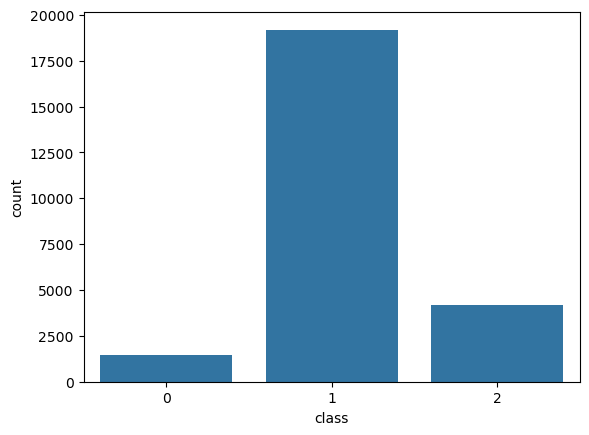

In [15]:
sns.countplot(x=df['class']);  

# _Using Pipeline for Data Processing and Modeling_

## _RandomForestClassifier_

### _Import_

In [16]:
from sklearn.feature_extraction.text import CountVectorizer  

# Metinleri sayısal vektörlere dönüştürmek için CountVectorizer sınıfını içe aktarır

from sklearn.ensemble import RandomForestClassifier  

# Random Forest sınıflandırma modelini içe aktarır; birden fazla karar ağacını birleştirerek güçlü bir tahmin modeli oluşturur

from sklearn.pipeline import Pipeline  

# Veri işleme ve model adımlarını ardışık bir şekilde birleştirmek için Pipeline sınıfını içe aktarır

from sklearn.model_selection import train_test_split  

# Veriyi eğitim ve test setlerine ayırmak için gerekli fonksiyonu içe aktarır

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  

# Model performansını değerlendirmek için gerekli metrikleri ve karışıklık matrisini içe aktarır

from sklearn.svm import SVC  

# Destek Vektör Makinesi (Support Vector Classifier) sınıflandırıcı modelini içe aktarır

import joblib

# joblib kütüphanesini projeye dahil eder

### _x, y;_

In [17]:
x = df['tweet']  
# Modelin girdi (features) verisi olarak metin sütununu alır

y = df['class']  
# Modelin hedef (target) verisi olarak sınıf sütununu alır (ham/spam)

### _Pipeline;_

In [18]:
clf = Pipeline([
    ('CountVect', CountVectorizer()),
    ('Classifier', RandomForestClassifier())
])  

# Pipeline ile metin verisini önce CountVectorizer ile vektörleştirir, ardından Random Forest sınıflandırıcı ile tahmin yapar

### _train_test_split;_

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)  

# Veriyi %80 eğitim ve %20 test olarak ayırır; random_state ile tekrar üretilebilirlik sağlanır

### _fit;_

In [20]:
clf.fit(x_train, y_train)  

# Pipeline içindeki CountVectorizer ve Random Forest modelini eğitim verisi ile birlikte eğitir

Pipeline(steps=[('CountVect', CountVectorizer()),
                ('Classifier', RandomForestClassifier())])

### _predict;_

In [21]:
tahmin = clf.predict(x_test)  

# Eğitilmiş model ile test verisinin sınıflarını tahmin eder

### _accuracy_score;_

In [22]:
accuracy_score(y_test, tahmin)  

# Modelin test verisi üzerindeki doğruluk (accuracy) oranını hesaplar

0.8890457938269114

### _classification_report;_

In [23]:
print(classification_report(y_test, tahmin))  

# Modelin test verisi üzerindeki sınıf bazlı performansını gösterir
# Precision, Recall, F1-score ve destek (support) değerlerini içerir

              precision    recall  f1-score   support

           0       0.52      0.29      0.37       290
           1       0.91      0.96      0.93      3832
           2       0.84      0.79      0.81       835

    accuracy                           0.89      4957
   macro avg       0.76      0.68      0.71      4957
weighted avg       0.88      0.89      0.88      4957



### _confusion_matrix;_

In [24]:
confusion_matrix(tahmin, y_test)  

# Tahminler ile gerçek değerler arasındaki karışıklık matrisini hesaplar
# Hangi sınıfların doğru/yanlış tahmin edildiğini gösterir

array([[  85,   66,   14],
       [ 185, 3665,  164],
       [  20,  101,  657]])

## _Support Vector Classifier;_

### _pipeline;_

In [25]:
svm = Pipeline([
    ('CountVect', CountVectorizer()),
    ('Classifier', SVC())
])  

# Pipeline oluşturur: metni önce CountVectorizer ile vektörleştirir, ardından Support Vector Classifier ile sınıflandırır

### _svm.fit;_

In [26]:
svm.fit(x_train, y_train)  

# Pipeline içindeki CountVectorizer ve Random Forest modelini eğitim verisi ile birlikte eğitir

Pipeline(steps=[('CountVect', CountVectorizer()), ('Classifier', SVC())])

### _svm.predict;_

In [27]:
tahmin2 = svm.predict(x_test)  

# Eğitilmiş model ile test verisinin sınıflarını tahmin eder

### _accuracy_score;_

In [28]:
accuracy_score(y_test, tahmin2)  

# İkinci modelin (svm pipeline) test verisi üzerindeki doğruluk (accuracy) oranını hesaplar

0.8950978414363526

### _classification_report;_

In [29]:
print(classification_report(y_test, tahmin2))  

# İkinci modelin test verisi üzerindeki sınıf bazlı performansını gösterir
# Precision, Recall, F1-score ve destek (support) değerlerini içerir

              precision    recall  f1-score   support

           0       0.52      0.04      0.08       290
           1       0.92      0.96      0.94      3832
           2       0.80      0.89      0.85       835

    accuracy                           0.90      4957
   macro avg       0.75      0.63      0.62      4957
weighted avg       0.88      0.90      0.87      4957



### _confusion_matrix;_

In [30]:
confusion_matrix(tahmin2, y_test)  

# İkinci modelin tahminleri ile gerçek değerler arasındaki karışıklık matrisini hesaplar
# Hangi sınıfların doğru/yanlış tahmin edildiğini gösterir

array([[  13,   11,    1],
       [ 239, 3678,   88],
       [  38,  143,  746]])

### _heatmap;_

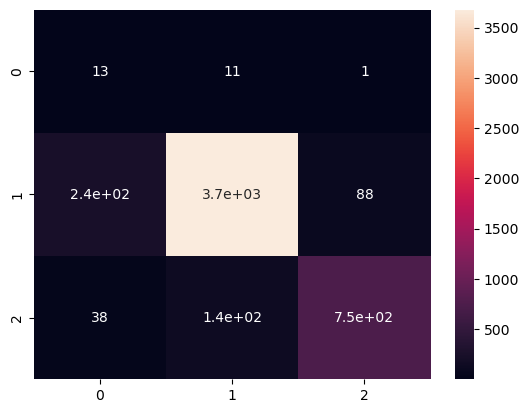

In [31]:
sns.heatmap(confusion_matrix(tahmin2, y_test), annot=True);  

# İkinci modelin karışıklık matrisini görselleştirir
# Annot=True ile hücre değerlerini gösterir

# _Testing the Model with Sample SMS Messages_

In [32]:
test1 = ['rt  boy dats coldtyga dwn bad cuffin dat hoe  place']  

# test1 → normal mesaj

In [33]:
clf.predict(test1)  

# Eğitilmiş model ile test1 mesajının sınıfını tahmin eder
# Çıkış: 'ham' (normal mesaj) veya 'spam'

array([1])

In [34]:
svm.predict(test1)

# SVM modeli test1 verisi için tahmin üretir

array([1])

## _Using Joblib for Model Persistence_

In [35]:
joblib.dump(svm,'svm_hs.pkl')

# SVM modelini svm_hs.pkl dosyasına kaydeder

['svm_hs.pkl']

In [36]:
joblib.dump(clf,'clf_hs.pkl')

# clf modelini clf_hs.pkl dosyasına kaydeder

['clf_hs.pkl']

In [37]:
loaded_model = joblib.load('svm_hs.pkl')

# svm_hs.pkl dosyasındaki modeli yükler

In [38]:
loaded_model.predict(test1)

# Yüklenen model test2 verisiyle tahmin yapar

array([1])

# _Creating a Word Cloud Function_

In [39]:
from wordcloud import WordCloud
# WordCloud sınıfını projeye dahil eder

from wordcloud import STOPWORDS
# WordCloud için durdurma kelimelerini içe aktarır

import numpy as np
# Sayısal işlemler için numpy kütüphanesini dahil eder

import matplotlib.pyplot as plt
# Grafik ve görselleştirme işlemleri için matplotlib ekler

from PIL import Image
# Görüntü işleme işlemleri için PIL.Image modülünü içe aktarır

In [40]:
def wc(data,color):
    # Kelime bulutu fonksiyonunu tanımlar

    plt.figure(figsize=(10,10))
    # Grafik boyutunu ayarlar

    wc=WordCloud(background_color=color, stopwords=STOPWORDS)
    # WordCloud nesnesini verilen arka plan ve stopwords ile oluşturur

    wc.generate(' '.join(df))
    # Data liste elemanlarını birleştirerek kelime bulutu üretir

    plt.imshow(wc)
    # Kelime bulutunu görüntüler

    plt.axis('off')
    # Grafik eksenlerini gizler

In [41]:
hate = df[df["class"] == 0]
offensive = df[df["class"] == 1]
neither = df[df["class"] == 2]

In [42]:
hate.head()

,tweet,class
85,whalelookyhere queer gaywad,0
89,whitethunduh alsarabsss hes beaner smh tell h...,0
110,devilgrimz vigxrarts fucking gay blacklisted h...,0
184,markroundtreejr lmfaoooo hate black people th...,0
202,nochillpaz at im nigger lmfao,0


In [43]:
offensive.head()

,tweet,class
1,rt boy dats coldtyga dwn bad cuffin dat hoe ...,1
2,rt urkindofbrand dawg rt fuck bitch start cr...,1
3,rt cganderson vivabased look like tranny,1
4,rt shenikaroberts shit hear true faker bitch ...,1
5,tmadisonx shit blows meclaim faithful somebody...,1


In [44]:
neither.head()

,tweet,class
0,rt mayasolovely woman complain cleaning house...,2
40,momma said pussy cats inside doghouse,2
63,simplyaddictedtoguys woof woof hot scally lad,2
66,allaboutmanfeet woof woof hot soles,2
67,allyhaaaaa lemmie eat oreo amp dishes oreo lol,2


# _Sentiment Analysis_

In [45]:
from textblob import TextBlob

# TextBlob kütüphanesindeki sınıfı projeye dahil eder

In [51]:
test1 = 'allyhaaaaa lemmie eat oreo amp dishes oreo lol'

In [52]:
blob = TextBlob(test1)

# test1 metninden bir TextBlob nesnesi oluşturur

In [53]:
blob.sentiment

# metnin duygu analizini (polarity ve subjectivity) hesaplar

Sentiment(polarity=0.8, subjectivity=0.7)

In [54]:
blob.sentiment.polarity

# metnin duygu değerini sayı olarak döndürür

0.8

In [55]:
blob.sentiment.subjectivity

# metnin öznelik derecesini döndürür

0.7

_Bu projede iki farklı model eğitilmiştir ve performansları karşılaştırılmıştır._
_İkinci model (SVM), daha yüksek doğruluk ve daha dengeli sınıflandırma performansı gösterdiği için **en iyi model olarak seçilmiştir**._